In [16]:
 !pip install numpy
 !pip install pandas
 !pip install matplotlib
 !pip install numpy scikit-learn
 !pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [23]:
import seaborn as sns 
#Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

In [27]:
print(titanic_data.shape)
print(titanic_data.columns)

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [28]:
# step-2 : Basic data inspection
#display first few records
print(titanic_data.head)

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [41]:
print(titanic_data.tail)

<bound method NDFrame.tail of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [29]:
# Review the structure of the dataset 
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [30]:
print(titanic_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [32]:
# identifying missing values 
missing_values = titanic_data.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [33]:
# dealing with missing values 
# dropping columns with excessive missing values
new_titanic_df = titanic_data.drop(columns=['deck'])

In [37]:
# imputing median age for missing age data 
new_titanic_df['age'].fillna(new_titanic_df['age'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2556\2507570607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_titanic_df['age'].fillna(new_titanic_df['age'].median(),inplace=True)


In [36]:
missing_values = new_titanic_df.isnull().sum()
print(missing_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [38]:
data = new_titanic_df
data['embark_town'].dtype
data['embark_town'].unique()
# data.select_dtypes(include='objects').columns
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_2556\862708449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [40]:
data = new_titanic_df
data['embarked'].dtype
data['embarked'].unique()
# data.select_dtypes(include='objects').columns
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_2556\2916521888.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [46]:
# step-4: Encode categorical variables 
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])

In [47]:
data.info

<bound method DataFrame.info of      survived  pclass  sex   age  sibsp  parch     fare  embarked   class  \
0           0       3    1  22.0      1      0   7.2500         2   Third   
1           1       1    0  38.0      1      0  71.2833         0   First   
2           1       3    0  26.0      0      0   7.9250         2   Third   
3           1       1    0  35.0      1      0  53.1000         2   First   
4           0       3    1  35.0      0      0   8.0500         2   Third   
..        ...     ...  ...   ...    ...    ...      ...       ...     ...   
886         0       2    1  27.0      0      0  13.0000         2  Second   
887         1       1    0  19.0      0      0  30.0000         2   First   
888         0       3    0  28.0      1      2  23.4500         2   Third   
889         1       1    1  26.0      0      0  30.0000         0   First   
890         0       3    1  32.0      0      0   7.7500         1   Third   

       who  adult_male  embark_town alive  

In [48]:
# step-5: select features and target 
data = data[['pclass','sex','age','fare','embarked','survived']]
x = data[['pclass','sex','age','fare','embarked']]
y = data['survived']

In [52]:
# set-6: Train_test split
x_train,X_test,y_train,y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [55]:
# set-7: Train model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [56]:
LogisticRegression(max_iter=1000)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [57]:
# step-8: Prediction
y_pred = model.predict(x_test)

In [58]:
# step-9: from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7947761194029851


In [60]:
new_passenger = pd.DataFrame({
    'pclass' : [3],
    'sex' : ['male'],
    'age' : [28],
    'fare' : [7.25],
    'embarked' : ['S']
        })

In [61]:
new_passenger_encoded = pd.get_dummies(new_passenger)
new_passenger_encoded = new_passenger_encoded.reindex(columns=x.columns, fill_value=0)

In [62]:
prediction = model.predict(new_passenger_encoded)
print("survived" if prediction[0] == 1 else "Did Not Survive")

survived


In [63]:
new_passenger = pd.DataFrame({
    'pclass' : [1,3,2],
    'sex' : ['female','male','female'],
    'age' : [38, 45, 14],
    'fare' : [80.0, 80.05, 20.0],
    'embarked' :['C', 'S', 'Q']
})

In [75]:
new_passenger_encoded = pd.get_dummies(new_passenger)
new_passenger_encoded = new_passenger_encoded.reindex(columns=x.columns, fill_value=0)

In [76]:
predictions = model.predict(new_passenger_encoded)

for i, pred in enumerate(predictions):
    print(f"Passenger {i+1}:", "Survived" if pred == 1 else "Did Not Survive") 

Passenger 1: Survived
Passenger 2: Survived
Passenger 3: Survived


In [74]:
# Outlier detection - 'Age'
mean_age = np.mean(titanic_data['age']) # calculates the mean
std_dev_age = np.std(titanic_data['age']) # calculates the standard deviation
Z_scores_age = (titanic_data['age'] - mean_age) / std_dev_age # computes the Z-scores
outliers_age = titanic_data['age'][np.abs(Z_scores_age) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("Outliers in 'Age' using Z-score: \n", outliers_age)

# Outlier detection - 'Fare'
mean_fare = np.mean(titanic_data['fare']) # calculates the mean
std_dev_fare = np.std(titanic_data['fare']) # calculates the standard deviation
Z_scores_fare = (titanic_data['fare'] - mean_fare) / std_dev_fare # computes the Z-scores
outliers_fare = titanic_data['fare'][np.abs(Z_scores_fare) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("\nOutliers in 'Fare' using Z-score: \n", outliers_fare)

Outliers in 'Age' using Z-score: 
 630    1.000000
851    0.924604
Name: age, dtype: float64

Outliers in 'Fare' using Z-score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


In [68]:
# Normalization
# Import necessary libraries
import seaborn as sns
import pandas as pd

# Load the Titanic Dataset
titanic_data = sns.load_dataset('titanic')

# Normalize 'age'
titanic_data['age'] = (titanic_data['age'] - titanic_data['age'].min()) / (titanic_data['age'].max() - titanic_data['age'].min())

# Display the normalized ages
print(titanic_data['age'])

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: age, Length: 891, dtype: float64


In [69]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Select 'fare' column and drop NaN values
fare = titanic_data[['fare']].dropna()

# Create a StandardScaler object
scaler = StandardScaler()

# Use the scaler
titanic_data['stand_fare'] = pd.DataFrame(scaler.fit_transform(fare), columns=fare.columns, index=fare.index)

# Display standardized fare values
print(titanic_data['stand_fare'])

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: stand_fare, Length: 891, dtype: float64


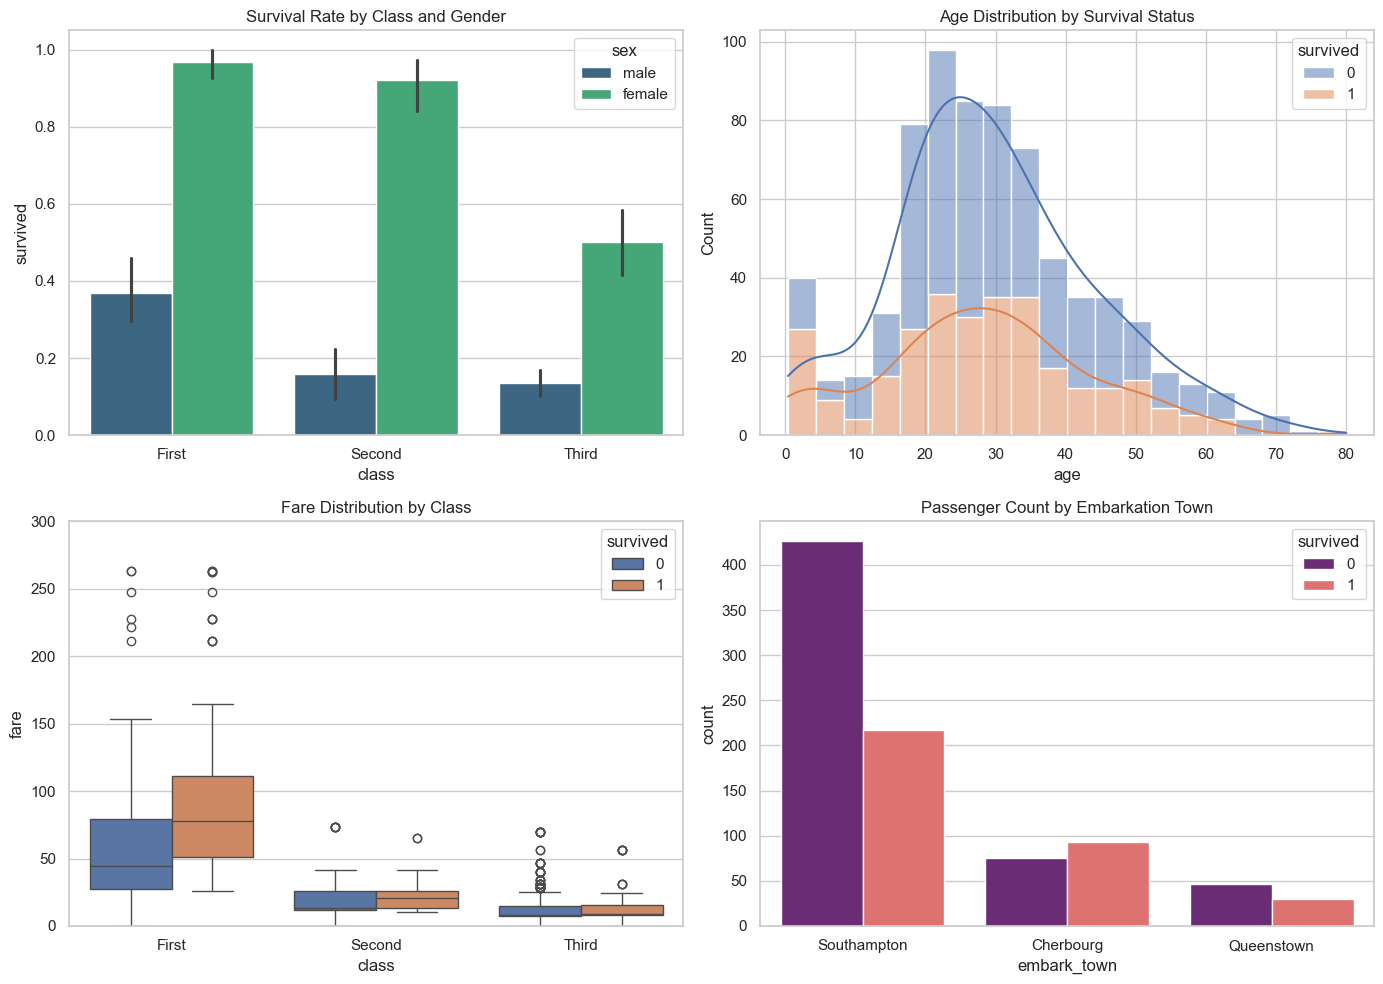

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the built-in dataset
titanic = sns.load_dataset('titanic')

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with multiple subplots
plt.figure(figsize=(14, 10))

# Plot 1: Survival Rate by Passenger Class (Bar Chart)
plt.subplot(2, 2, 1)
sns.barplot(data=titanic, x='class', y='survived', hue='sex', palette='viridis')
plt.title('Survival Rate by Class and Gender')

# Plot 2: Age Distribution of Passengers (Histogram)
plt.subplot(2, 2, 2)
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')

# Plot 3: Fare vs. Class (Boxplot)
plt.subplot(2, 2, 3)
sns.boxplot(data=titanic, x='class', y='fare', hue='survived')
plt.ylim(0, 300) # Limit y-axis to see boxes more clearly
plt.title('Fare Distribution by Class')

# Plot 4: Count of Passengers by Town (Count Plot)
plt.subplot(2, 2, 4)
sns.countplot(data=titanic, x='embark_town', hue='survived', palette='magma')
plt.title('Passenger Count by Embarkation Town')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()